# Elliott Wave Theory

In [ ]:
#default
ticker="MSFT"
start_date="2025-01-01"
end_date="2025-05-20"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import ta

In [ ]:
print(f"Ticker: {ticker}")
print(f"Start date: {start_date}")
print(f"End date: {end_date}")

In [ ]:
# Download historical data
data = yf.download(ticker, start=start_date, end=end_date,multi_level_index=False)
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
display(data.head())

,Close,High,Low,Open,Volume
Date,,,,,
2024-01-02,367.380615,372.363289,363.319185,370.342474,25258600
2024-01-03,367.113159,369.748136,365.042827,365.538123,23083500
2024-01-04,364.478210,369.589666,363.715466,367.182536,20901500
2024-01-05,364.289978,368.559424,363.051739,365.498501,20987000
2024-01-08,371.164673,371.669884,365.538121,365.825371,23134000


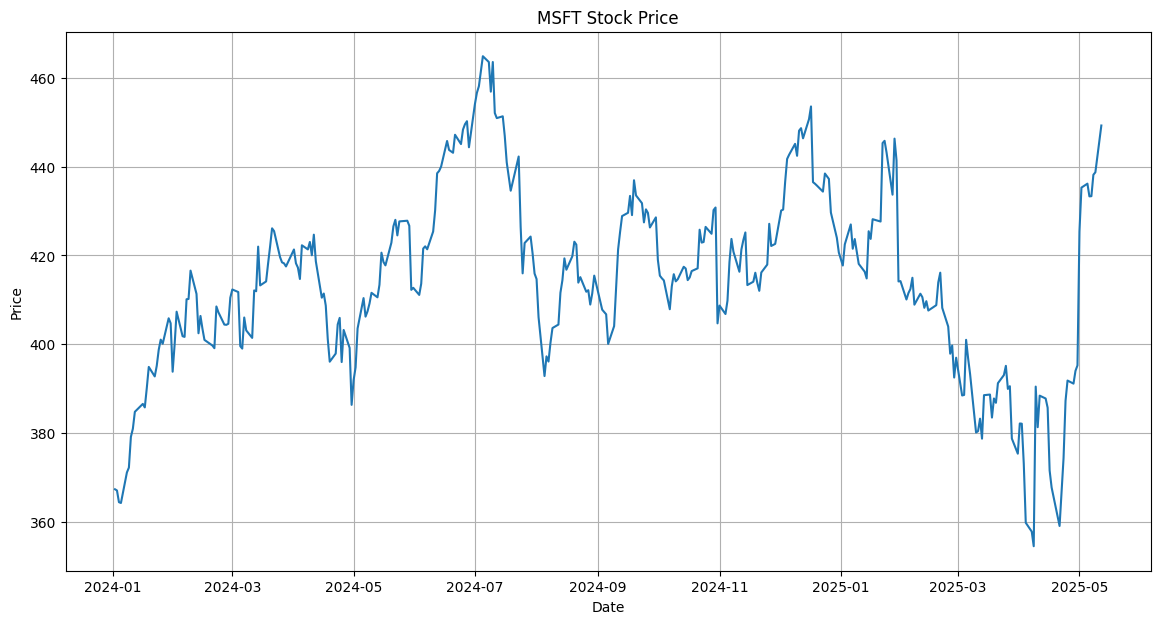

In [4]:
#plot the stock price
plt.figure(figsize=(14, 7))
plt.plot(data['Close'])
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

## Elliott Wave Theory (ทฤษฎีคลื่น Elliott):

- ความหมาย: Elliott Wave Theory เป็นทฤษฎีที่อธิบายว่าตลาดเคลื่อนที่เป็นวัฏจักร โดยมีรูปแบบคลื่นที่สามารถคาดการณ์ได้
- หลักการพื้นฐาน:
    - ตลาดเคลื่อนที่เป็นวัฏจักร (Cycles)
    - วัฏจักรเหล่านี้ ประกอบด้วยรูปแบบคลื่นที่ซ้ำ ๆ กัน
    - รูปแบบคลื่นเหล่านี้ สามารถใช้เพื่อคาดการณ์การเคลื่อนที่ของราคาในอนาคต
- ประเภทของคลื่น:
    1. Impulse Waves (คลื่นขับ): คลื่นที่เคลื่อนที่ไปในทิศทางเดียวกับแนวโน้มหลัก (Major Trend) ประกอบด้วย 5 คลื่น (1, 2, 3, 4, 5)
        - คลื่น 1, 3, 5: เคลื่อนที่ไปในทิศทางเดียวกับแนวโน้มหลัก
        - คลื่น 2, 4: เคลื่อนที่สวนทางกับแนวโน้มหลัก (Correction)
    2. Corrective Waves (คลื่นปรับ): คลื่นที่เคลื่อนที่สวนทางกับแนวโน้มหลัก ประกอบด้วย 3 คลื่น (A, B, C)
        - คลื่น A: เคลื่อนที่สวนทางกับแนวโน้มหลัก
        - คลื่น B: เคลื่อนที่ไปในทิศทางเดียวกับแนวโน้มหลัก (แต่เป็นการปรับตัวขึ้นชั่วคราว)
        - คลื่น C: เคลื่อนที่สวนทางกับแนวโน้มหลัก
- กฎของ Elliott Wave Theory:
    1. คลื่น 2: ไม่สามารถปรับตัวลงต่ำกว่าจุดเริ่มต้นของคลื่น 1 ได้
    2. คลื่น 3: ไม่สามารถเป็นคลื่นที่สั้นที่สุดในบรรดาคลื่น 1, 3, และ 5 ได้
    3. คลื่น 4: ไม่สามารถซ้อนทับกับพื้นที่ราคาของคลื่น 1 ได้
- Fibonacci Ratios: Elliott Wave Theory มักจะใช้ร่วมกับ Fibonacci Ratios เพื่อหาระดับเป้าหมายราคา และระดับการปรับตัว
- ระดับของคลื่น: คลื่น Elliott มีหลายระดับ (Degree) ตั้งแต่ระดับที่เล็กที่สุด ไปจนถึงระดับที่ใหญ่ที่สุด
- การใช้งาน:
    - ระบุแนวโน้ม
    - คาดการณ์การเคลื่อนที่ของราคา
    - หาระดับเป้าหมายราคา
    - บริหารความเสี่ยง

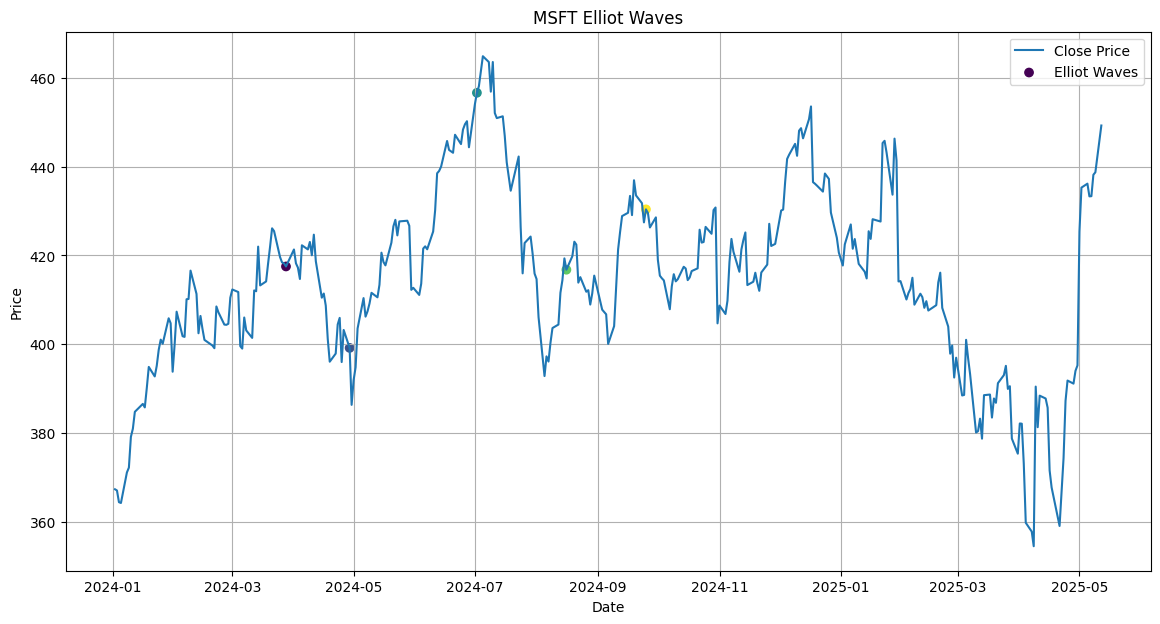

In [9]:
import warnings
warnings.filterwarnings("ignore")
from scipy.signal import find_peaks
# Elliot Wave Theory
def identify_elliot_waves(data, price_col='Close', window=20):
    """
    Enhanced placeholder function for Elliott Wave identification.
    This is a simplified algorithm that attempts to identify potential Elliott Wave patterns
    based on local peaks and troughs in the price data.
    
    Parameters:
    -----------
    data : pandas.DataFrame
        DataFrame containing price data
    price_col : str, default 'Close'
        Column name for price data
    window : int, default 20
        Window size for peak/trough detection
        
    Returns:
    --------
    pandas.DataFrame
        Original DataFrame with added 'Elliot_Wave' column
    """
    # Make a copy to avoid modifying the original
    result = data.copy()
    
    # Initialize Elliot Wave column
    result['Elliot_Wave'] = np.nan
    
    # Find peaks and troughs for wave identification
    # Use negative of price to find troughs
    smooth_price = result[price_col].rolling(window=window, center=True).mean()
    smooth_price = smooth_price.fillna(result[price_col])
    
    # Calculate price range for prominence parameter
    price_range = smooth_price.max() - smooth_price.min()
    prominence = price_range * 0.05  # 5% of total price range
    
    # Find peaks (potential wave 1, 3, 5 ends)
    peaks, _ = find_peaks(smooth_price, prominence=prominence)
    
    # Find troughs (potential wave 2, 4 ends)
    troughs, _ = find_peaks(-smooth_price, prominence=prominence)
    
    # Ensure we have enough peaks and troughs
    if len(peaks) >= 3 and len(troughs) >= 2:
        # Sort peaks and troughs by index
        extrema = sorted([(idx, 'peak') for idx in peaks] + 
                         [(idx, 'trough') for idx in troughs], 
                         key=lambda x: x[0])
        
        # Label potential Elliott waves
        wave_num = 1
        for i, (idx, point_type) in enumerate(extrema):
            if wave_num <= 5:  # Only label up to wave 5
                if (wave_num % 2 == 1 and point_type == 'peak') or \
                   (wave_num % 2 == 0 and point_type == 'trough'):
                    result['Elliot_Wave'].iloc[idx] = wave_num
                    wave_num += 1
            
            if wave_num > 5:
                break
    else:
        # Fallback to placeholder if not enough peaks/troughs
        if len(result) > 30:  # Ensure we have enough data points
            result['Elliot_Wave'].iloc[0] = 1      # Start of Wave 1
            result['Elliot_Wave'].iloc[len(result)//6] = 2  # End of Wave 1, Start of Wave 2
            result['Elliot_Wave'].iloc[len(result)//3] = 3  # End of Wave 2, Start of Wave 3
            result['Elliot_Wave'].iloc[len(result)//2] = 4  # End of Wave 3, Start of Wave 4
            result['Elliot_Wave'].iloc[2*len(result)//3] = 5  # End of Wave 4, Start of Wave 5
        else:
            result['Elliot_Wave'].iloc[0] = 1  # Start of Wave 1
            result['Elliot_Wave'].iloc[10] = 2  # End of Wave 1, Start of Wave 2
            result['Elliot_Wave'].iloc[20] = 3  # End of Wave 2, Start of Wave 3
    
    return result

data = identify_elliot_waves(data)
# Plot Elliot Waves
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.scatter(data.index[~data['Elliot_Wave'].isna()], 
            data.loc[~data['Elliot_Wave'].isna(), 'Close'], 
            c=data.loc[~data['Elliot_Wave'].isna(), 'Elliot_Wave'], 
            cmap='viridis', label='Elliot Waves')
plt.title(f'{ticker} Elliot Waves')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()